<a href="https://colab.research.google.com/github/Malekkamoua/Medical-data-classifier/blob/main/3_Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Unzip all data 

In [ ]:
import os,zipfile
os.getcwd()
os.chdir('/content/gdrive/MyDrive/preprocessed_data')
os.getcwd()
file=os.listdir()
for i in range(len(file)):

  unzip=zipfile.ZipFile(file[i])
  unzip.extractall('/content/gdrive/MyDrive/unzipped') 

#from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
#with ZipFile('/content/gdrive/MyDrive/preprocessed_data/preprocessed_data_part1.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
  # zipObj.extractall()

In [ ]:
#import os
#os.listdir("/content/content/content/preprocessed_data_part1")
import os
  
# Folder Path

  
# Change the directory
#os.chdir(path)
  
# Read text File
doc =[]
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        f.readline()
  

subdirs = [x[0] for x in os.walk('/content/gdrive/MyDrive/unzipped/content/content')]
for dir in subdirs:
# iterate through all file
  for file in os.listdir(dir):
    # Check whether file is in text format or not
      if file.endswith(".txt"):
          file_path = f"{dir}/{file}"
  
        # call read text file function
          with open(file_path, 'r') as f:
            doc.append(f.readline())
doc 

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:

from nltk import word_tokenize
# Preparing the dataset


sentences = [word_tokenize(sentence) for sentence in doc]
    
sentences

In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(
        sentences,
        size=150,
        window=10,
        min_count=5,
        workers=10,
        iter=10)
model.save("word2vec.model")

In [ ]:
 
model.most_similar("facebook")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd

plt.style.use('seaborn-whitegrid')

def tsne_scatterplot(model, search_word):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=10)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, init='pca')
    coordinates = tsne_model.fit_transform(tokens)
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()

tsne_scatterplot(model, "facebook")

In [ ]:
array_vec = []
for idx, key in enumerate(model.wv.vocab):
  array_vec.append(model.wv[key])
array_vec

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,101)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(array_vec)
    distortions.append(kmeanModel.inertia_)

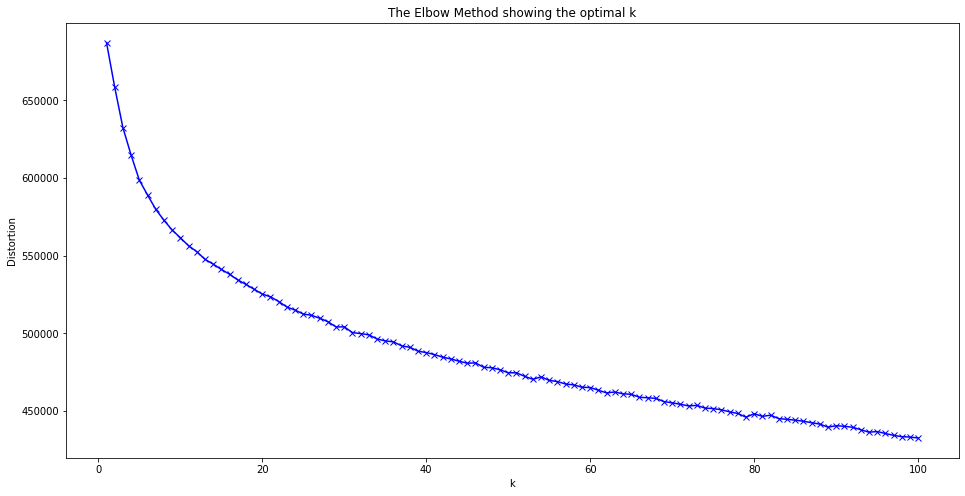

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()